# Tarea 4 Algoritmos de Aprendizaje no Supervisado


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# librerias

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Cargar el dataset

In [7]:
df = pd.read_csv('Desktop/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Información general del dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Estadísticas descriptivas

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Visualizar la distribución de variables

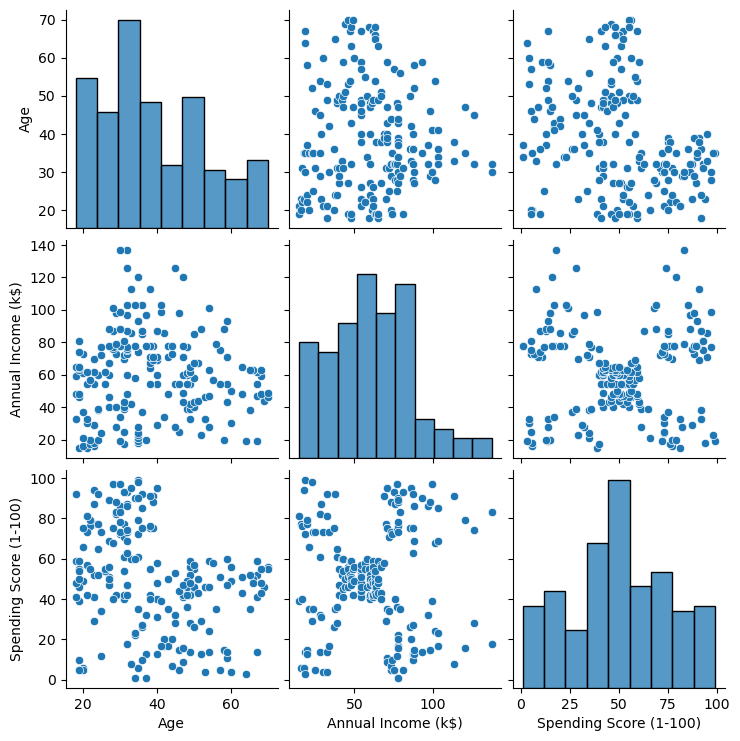

In [10]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Gráfico de distribución de la variable 'Annual Income'

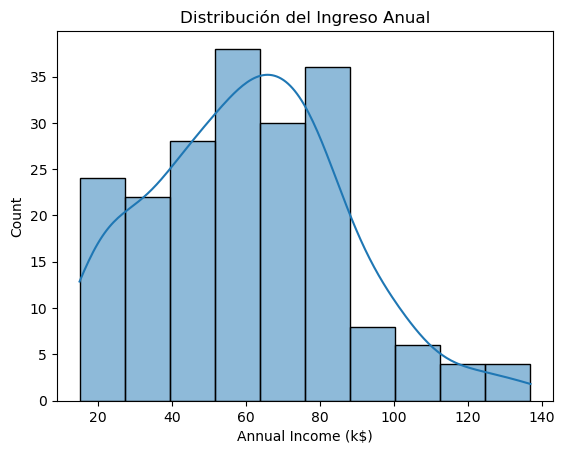

In [11]:
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribución del Ingreso Anual')
plt.show()

# Gráfico de correlación

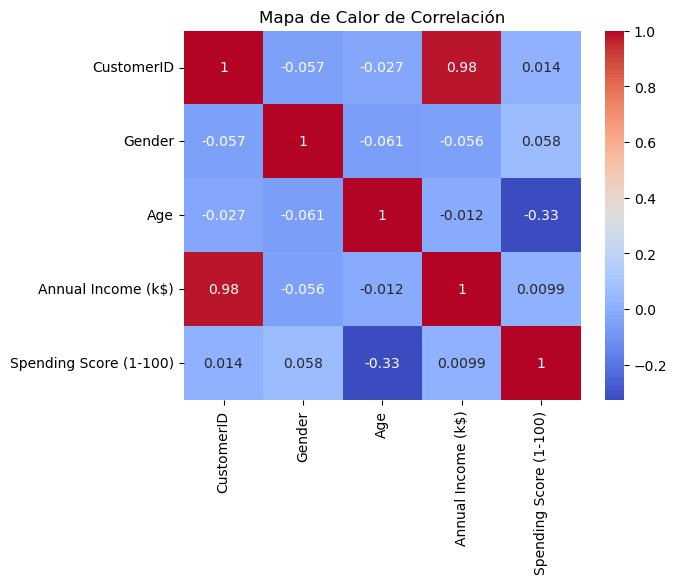

In [14]:
# Conversión de la columna de género a valores numéricos
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Crear el mapa de calor de correlación
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

Paso 3: Preprocesamiento de los Datos
Reviso los valores faltantes, codifica variables categóricas y selecciona características importantes.

# Comprobar valores faltantes

In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Codificar la variable de género

In [16]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar las características para el modelo de clustering

In [18]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Paso 4: Entrenamiento de Modelos de Clustering

K-means Clustering

In [22]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


# Gráfico del método del codo

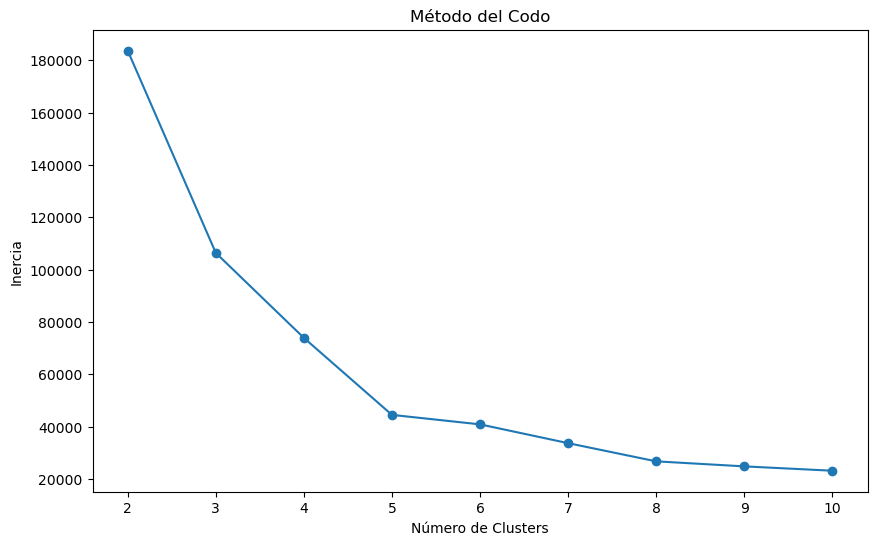

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Gráfico del Coeficiente de Silhouette

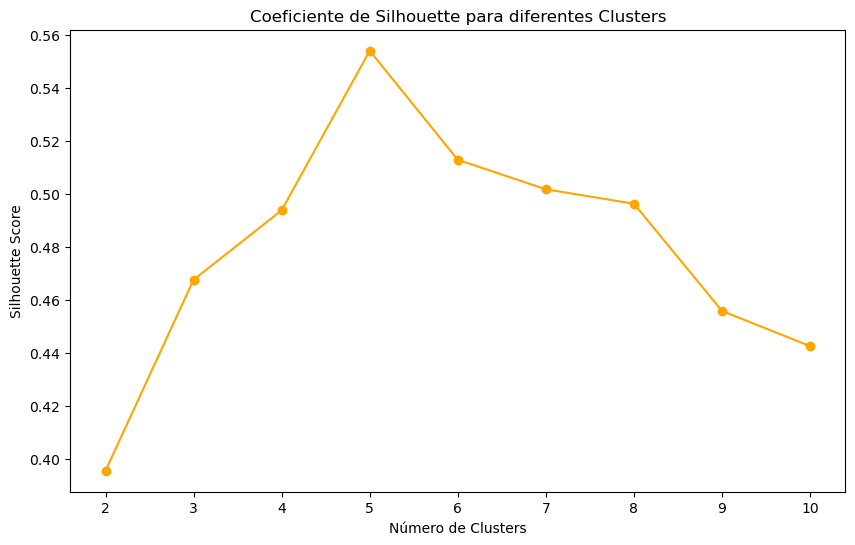

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silhouette para diferentes Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Entrenar el modelo K-means con el número óptimo de clusters (por ejemplo, 5).

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X)

Clustering Jerárquico

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Construir el dendrograma

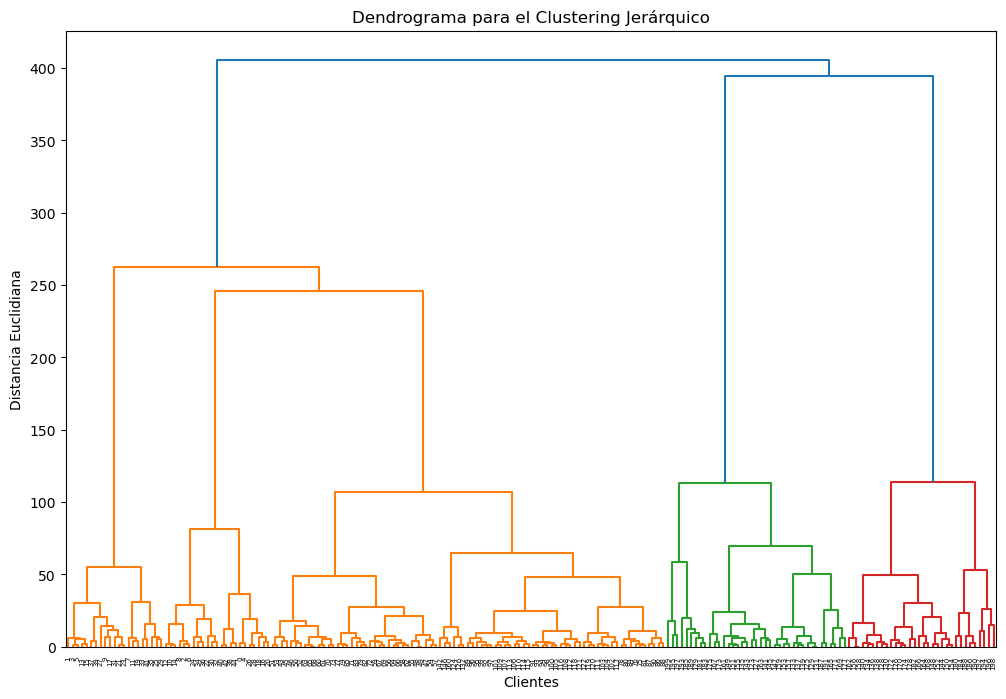

In [28]:
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma para el Clustering Jerárquico')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

Entrenar el modelo de Clustering Jerárquico con el número óptimo de clusters.

In [30]:
from sklearn.cluster import AgglomerativeClustering

# Ajuste para clustering jerárquico sin especificar 'affinity'
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster_Hierarchical'] = hierarchical.fit_predict(X)

Paso 5: Evaluación de Desempeño del Modelo

# Evaluación de K-means

In [33]:
silhouette_kmeans = silhouette_score(X, df['Cluster_KMeans'])
calinski_kmeans = calinski_harabasz_score(X, df['Cluster_KMeans'])
davies_kmeans = davies_bouldin_score(X, df['Cluster_KMeans'])

print(f"K-means Clustering - Silhouette Score: {silhouette_kmeans}")
print(f"K-means Clustering - Calinski-Harabasz Index: {calinski_kmeans}")
print(f"K-means Clustering - Davies-Bouldin Index: {davies_kmeans}")

K-means Clustering - Silhouette Score: 0.553931997444648
K-means Clustering - Calinski-Harabasz Index: 247.35899338037288
K-means Clustering - Davies-Bouldin Index: 0.5725628995597086


# Evaluación de Clustering Jerárquico

In [34]:
silhouette_hierarchical = silhouette_score(X, df['Cluster_Hierarchical'])
calinski_hierarchical = calinski_harabasz_score(X, df['Cluster_Hierarchical'])
davies_hierarchical = davies_bouldin_score(X, df['Cluster_Hierarchical'])

print(f"Hierarchical Clustering - Silhouette Score: {silhouette_hierarchical}")
print(f"Hierarchical Clustering - Calinski-Harabasz Index: {calinski_hierarchical}")
print(f"Hierarchical Clustering - Davies-Bouldin Index: {davies_hierarchical}")

Hierarchical Clustering - Silhouette Score: 0.5529945955148897
Hierarchical Clustering - Calinski-Harabasz Index: 243.07142892964563
Hierarchical Clustering - Davies-Bouldin Index: 0.5782207452369452


Paso 6: Visualización de Resultados

# Visualización de K-means

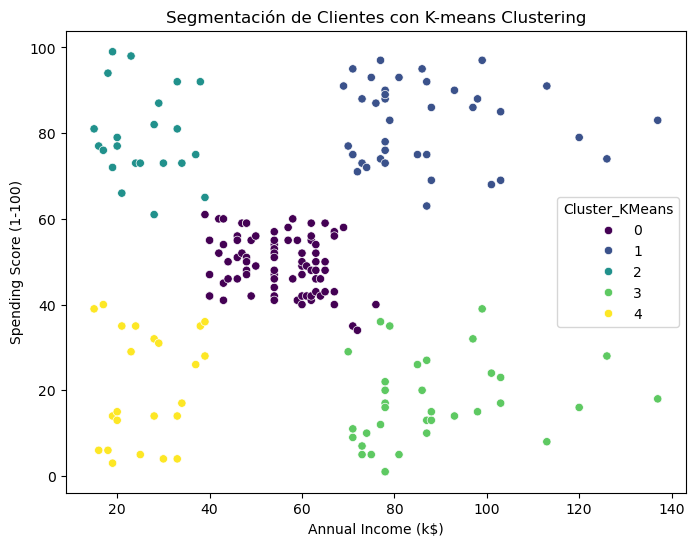

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', data=df, palette='viridis')
plt.title('Segmentación de Clientes con K-means Clustering')
plt.show()

# Visualización de Clustering Jerárquico

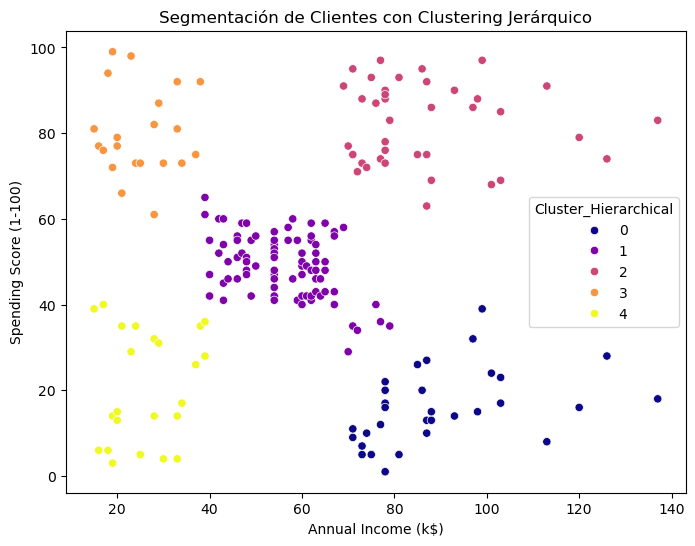

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Hierarchical', data=df, palette='plasma')
plt.title('Segmentación de Clientes con Clustering Jerárquico')
plt.show()